In [26]:
! pip3 install pysentimiento pandas numba

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import pandas as pd
from pysentimiento import create_analyzer
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('tweets.csv', encoding='cp1252')

analyzer = create_analyzer(task="sentiment", lang="en")

In [36]:
def evaluate_comments():
    resuslts = {
        'NEU': 0,
        'POS': 0,
        'NEG': 0,
    }
    for comment in data['text']:
        analysis = analyzer.predict(comment)
        resuslts['NEG'] += analysis.probas['NEG']
        resuslts['POS'] += analysis.probas['POS']
        resuslts['NEU'] += analysis.probas['NEU']
    resuslts['NEG'] /= len(data['text'])
    resuslts['POS'] /= len(data['text'])
    resuslts['NEU'] /= len(data['text'])
    return resuslts

([<matplotlib.patches.Wedge at 0x7fc53c308f70>,
 [Text(1.0957195042273582, 0.09694724367279547, 'Negative'),
  Text(-0.33797466275282023, 1.0467918261703792, 'Positive'),
  Text(0.24440166714491685, -1.0725053963019417, 'Neutral')])

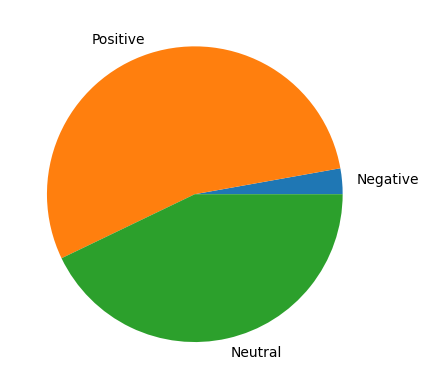

In [37]:
resuslts = evaluate_comments()
labels = 'Negative', 'Positive', 'Neutral'
sizes = [resuslts['NEG'] * 100, resuslts['POS'] * 100, resuslts['NEU'] * 100]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)